In [42]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

#### Load data

In [43]:
iris= datasets.load_iris()

In [44]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [45]:
print(iris.DESCR,'\n')

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [46]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [47]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [48]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [49]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [50]:
iris_data=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_target=pd.DataFrame(iris.target,columns=['target']) # Don't do this
# iris_target=pd.DataFrame(iris.target), # Do this

In [51]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [52]:
iris_target

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


#### Explore data

In [53]:
iris_data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [54]:
iris_data.shape

(150, 4)

In [55]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [56]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


array([[<AxesSubplot:title={'center':'sepal length (cm)'}>,
        <AxesSubplot:title={'center':'sepal width (cm)'}>],
       [<AxesSubplot:title={'center':'petal length (cm)'}>,
        <AxesSubplot:title={'center':'petal width (cm)'}>]], dtype=object)

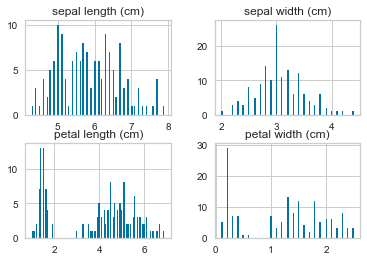

In [57]:
iris_data.hist(bins=100)
# no need to scale caz they are roughly in the same range 0-10

In [58]:
p=pd.DataFrame(pd.DataFrame(iris_target).value_counts())
p['name']=iris.target_names
p

,0,name
target,,
0,50,setosa
1,50,versicolor
2,50,virginica


#### Preprocess data

In [95]:
iris_data.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [59]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_target, test_size=0.3,shuffle=True,stratify=iris_target,random_state=100)

In [60]:
X_train.shape

(105, 4)

In [61]:
X_test.shape

(45, 4)

In [62]:
y_train.value_counts()

target
0         35
1         35
2         35
dtype: int64

In [63]:
y_test.value_counts()

target
0         15
1         15
2         15
dtype: int64

In [64]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
71,6.1,2.8,4.0,1.3
90,5.5,2.6,4.4,1.2
4,5.0,3.6,1.4,0.2
17,5.1,3.5,1.4,0.3
18,5.7,3.8,1.7,0.3
...,...,...,...,...
26,5.0,3.4,1.6,0.4
69,5.6,2.5,3.9,1.1
103,6.3,2.9,5.6,1.8
65,6.7,3.1,4.4,1.4


In [65]:
y_train

,target
71,1
90,1
4,0
17,0
18,0
...,...
26,0
69,1
103,2
65,1


In [66]:
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_train

array([[ 0.28475087, -0.67197674,  0.12944979,  0.11166391],
       [-0.44153677, -1.16026433,  0.35411471, -0.01861065],
       [-1.04677647,  1.28117364, -1.3308722 , -1.32135622],
       [-0.92572853,  1.03702984, -1.3308722 , -1.19108167],
       [-0.19944089,  1.76946123, -1.16237351, -1.19108167],
       [ 0.52684675,  0.79288605,  1.02810948,  1.54468403],
       [-0.07839295, -0.67197674,  0.74727832,  1.54468403],
       [ 0.52684675, -1.40440813,  0.63494586,  0.37221302],
       [ 0.52684675, -1.40440813,  0.69111209,  0.89331125],
       [ 0.76894263,  0.30459845,  0.74727832,  1.02358581],
       [-0.56258471,  0.79288605, -1.16237351, -1.32135622],
       [-1.53096823,  1.28117364, -1.55553712, -1.32135622],
       [ 0.28475087, -0.18368914,  0.63494586,  0.76303669],
       [ 0.40579881, -0.67197674,  0.57877963,  0.76303669],
       [-1.53096823,  0.79288605, -1.3308722 , -1.19108167],
       [ 1.01103851, -0.18368914,  0.69111209,  0.63276213],
       [ 0.76894263, -0.

In [67]:
X_train=pd.DataFrame(X_train,columns=iris.feature_names)
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.284751,-0.671977,0.129450,0.111664
1,-0.441537,-1.160264,0.354115,-0.018611
2,-1.046776,1.281174,-1.330872,-1.321356
3,-0.925729,1.037030,-1.330872,-1.191082
4,-0.199441,1.769461,-1.162374,-1.191082


In [68]:
iris_train=X_train.copy()
iris_train['target']=y_train['target'].to_numpy()

In [69]:
iris_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.284751,-0.671977,0.129450,0.111664,1
1,-0.441537,-1.160264,0.354115,-0.018611,1
2,-1.046776,1.281174,-1.330872,-1.321356,0
3,-0.925729,1.037030,-1.330872,-1.191082,0
4,-0.199441,1.769461,-1.162374,-1.191082,0


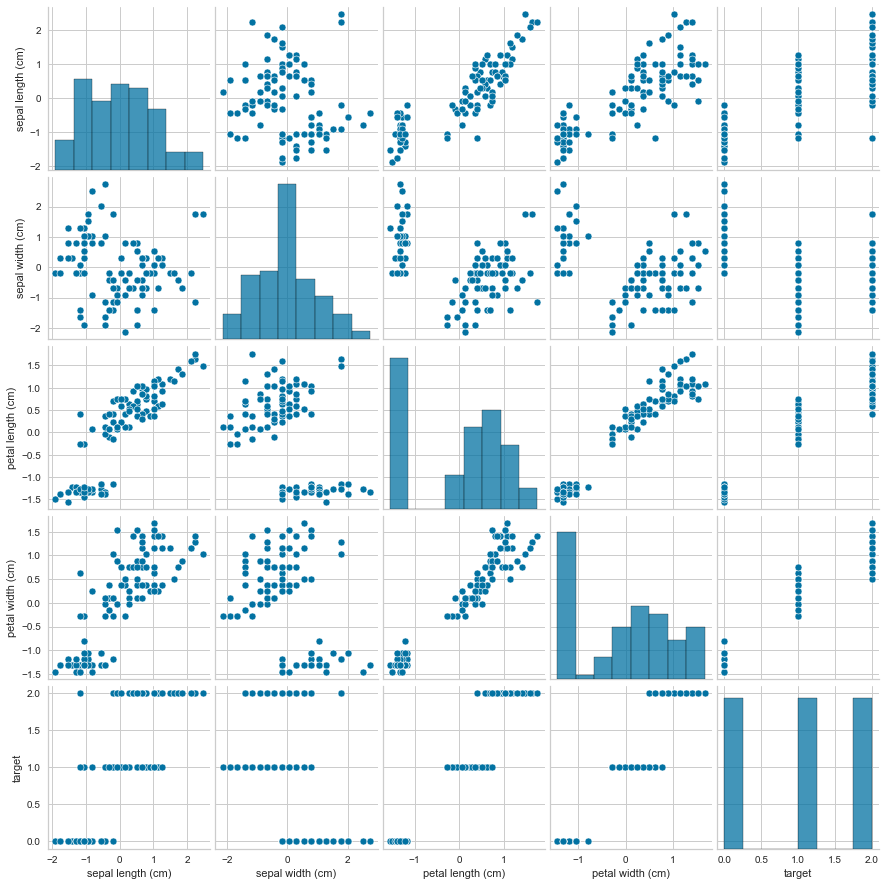

In [70]:
sns.pairplot(data=iris_train)

In [71]:
iris_corr=X_train.corr()
iris_corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.170046,0.885640,0.822458
sepal width (cm),-0.170046,1.000000,-0.447936,-0.389025
petal length (cm),0.885640,-0.447936,1.000000,0.964912
petal width (cm),0.822458,-0.389025,0.964912,1.000000


#### Model

In [72]:
X_test=scaler.transform(X_test)
X_test=pd.DataFrame(X_test,columns=iris.feature_names)

In [73]:
selected_features = ['petal length (cm)', 'sepal width(cm)']
# If you want ot check only selected_features, then anywhere related to x, select the selected_features columns

In [84]:
X_test.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [85]:
#Create logistic regression 
logr =LogisticRegression()

#Train the model using the training sets
logr.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = logr.predict(X_test)

/Users/dhanabordeemekintharanggur/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [86]:
logr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Classification Report: 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.83      1.00      0.91        15
   virginica       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45
 

Accuracy on train:   0.971 

Accuracy on test:  0.933 



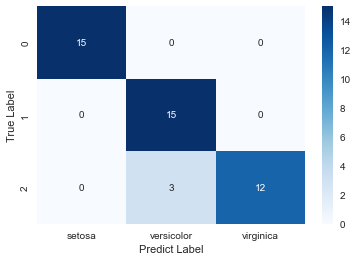

In [87]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Classification Report: \n", metrics.classification_report(y_test,y_pred,target_names=iris.target_names),'\n')
print("Accuracy on train:  ",logr.score(X_train,y_train).round(3),'\n')
print("Accuracy on test: ",logr.score(X_test,y_test).round(3),'\n')
cf=metrics.confusion_matrix(y_test,y_pred).round(3)
sns.heatmap(cf,annot=True,cmap='Blues', xticklabels=iris.target_names)
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

## say misclassification may happen in versicolor precision and virginica recall

In [88]:
12/15

0.8

In [89]:
logr.intercept_

array([-0.12202811,  1.81025811, -1.68823   ])

In [90]:
logr.coef_

array([[-0.96860877,  1.11838716, -1.63793709, -1.59544858],
       [ 0.50254069, -0.46794549, -0.21515752, -0.86555217],
       [ 0.46606808, -0.65044166,  1.85309461,  2.46100075]])

In [91]:
np.exp(logr.coef_)
# explain what these expected coefficients mean

array([[ 0.3796108 ,  3.05991506,  0.19438062,  0.20281753],
       [ 1.65291548,  0.62628766,  0.8064144 ,  0.42081912],
       [ 1.5937155 ,  0.52181526,  6.37953116, 11.716531  ]])

In [92]:
pred_prob = pd.DataFrame(logr.predict_proba(X_test))

In [93]:
metrics.roc_auc_score(y_test,pred_prob,multi_class='ovr')

1.0

/Users/dhanabordeemekintharanggur/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


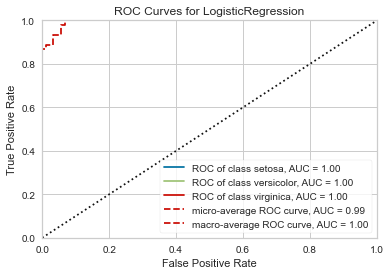

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [94]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(logr, classes=iris.target_names)
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()   